In [1]:
import mne
import numpy as np

In [2]:
sbj='002'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


onset = 
duration = 
desciption = 
my_ann = mne.Annotations(onset, duration, description)

In [3]:
onset = []
duration = []
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [4]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration)/160)

[0, 1312, 2624, 3936, 5248, 6560, 7872, 9184, 10496, 11808, 13120, 14432, 15744, 17056]
[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2]


In [5]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [6]:
Data.set_annotations(my_ann)

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~130 kB, data not loaded>

In [7]:
events, event_id=mne.events_from_annotations(Data)

epochs=mne.Epochs(Data, events, event_id=event_id,  baseline=(None,None))

Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [8]:
T1=epochs['T1']
T2=epochs['T2']

In [9]:
T1

<Epochs  |   7 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7>

In [10]:
montage = mne.channels.make_standard_montage('standard_1020')

In [11]:
print(montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


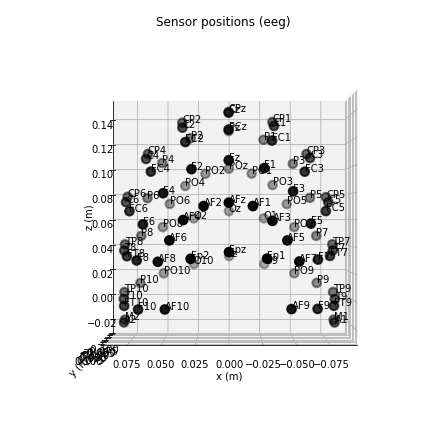

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


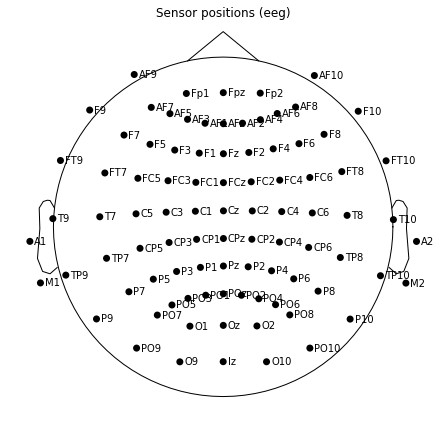

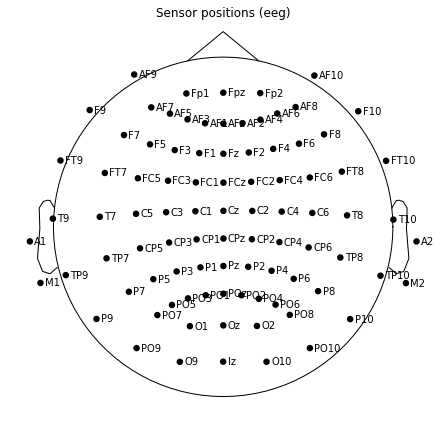

In [12]:
fig = montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
montage.plot(kind='topomap', show_names=True)

In [13]:
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [14]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [15]:
Data.rename_channels(ch_map)

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [16]:
Data.set_montage(montage)

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [17]:
import matplotlib.pyplot as plt

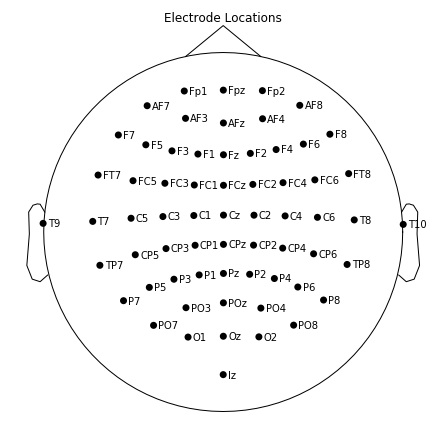

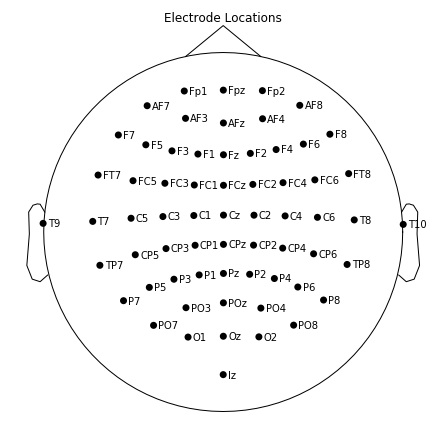

In [20]:
#fig = plt.figure()
Data.plot_sensors(ch_type='eeg',title = 'Electrode Locations', show_names = True)

Data.plot_sensors('3d')

In [19]:
epochs_params = dict(events=events, event_id=event_id, tmin=0, tmax=120)

In [20]:
eeg_ref=mne.Epochs(Data, **epochs_params, baseline=(None, None)).average()

14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


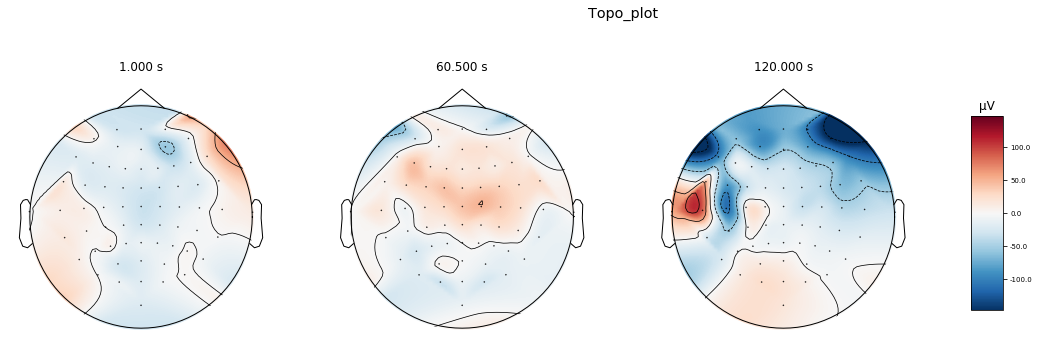

In [21]:
eeg_ref.plot_topomap(times=np.linspace(1,120,3), size=3., title='Topo_plot', time_unit='s');

In [22]:
epochs

<Epochs  |   14 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7
 'T2': 7>

In [23]:
T1=epochs['T1'].get_data()
T2=epochs['T2'].get_data()

Loading data for 7 events and 113 original time points ...
1 bad epochs dropped
Loading data for 7 events and 113 original time points ...
0 bad epochs dropped


In [24]:
T1[5][63][112]

2.805309734513274e-06

In [25]:
Data

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

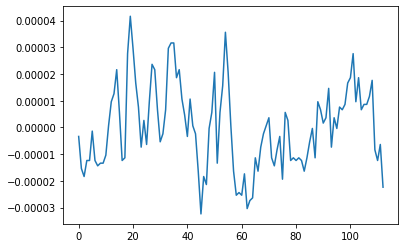

In [26]:
plt.plot(T1[1][1])